In [47]:
import os, sys
import networkx as nx
import pandas as pd
import toml
from src import settings
from src.utils import fileio
import numpy as np

# TREATMENT = os.environ["TREATMENT"]

CONFIG_PATH = os.path.join(settings.CONFIG_DIR, "main.toml")
with open(CONFIG_PATH, "r") as file:
    config = toml.load(file)

for TREATMENT in config["TREATMENTS"]:
    INPUT_DIR = os.path.join(settings.OUTPUT_DIR, "1_0_find_interactions", TREATMENT)

    treatment = fileio.load_files_from_folder(INPUT_DIR)
    d = np.ndarray((0,))
    for group_name, group_path in treatment.items():
        df = pd.read_csv(group_path, index_col=0)
        df = df.sort_values("start_of_interaction")
        df = df[["node_1", "node_2", "start_of_interaction"]]
        for num in range(1, 12):
            temp = df[df['node_1'].str.contains(rf'\bfly{num}\b')]
            diff = np.diff(temp.start_of_interaction.to_numpy())
            d = np.concatenate((d, diff))

    mask = d < 14
    count = np.sum(mask)
    
    print(f"{TREATMENT} {count/len(d)}")

CS_10D 0.1298031196499905
CsCh 0.11234963451835082
Cs_5DIZ 0.10114623735130333
LDA_5DIZ 0.10972472604265834
LDA_OCT_5DIZ 0.17704195003703455
OCT_5DIZ 0.1331772083301076


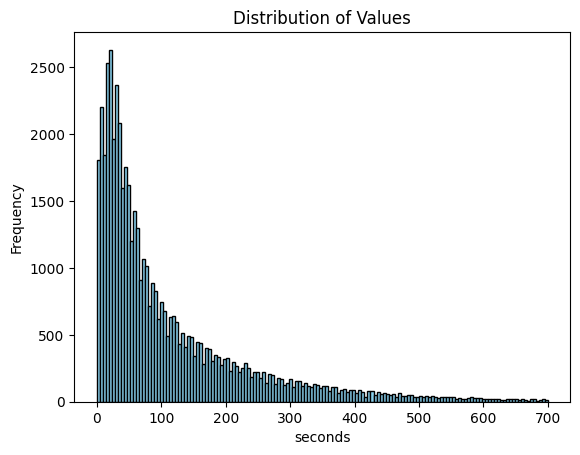

In [41]:
import numpy as np
import matplotlib.pyplot as plt


data = d
data = data[data <= 700]
# data = data / 24
plt.hist(data, bins=150, color='skyblue', edgecolor='black')
plt.xlabel('seconds')
plt.ylabel('Frequency')
plt.title('Distribution of Values')
plt.show()

0.11234963451835082


In [20]:
diff

array([232, 110,  43,  44, 349, 210, 278,  37, 273, 180,   4, 527, 231,
        73, 155,   1,  17, 140, 325,  66,   2,  22,  22,  13,  27,  21,
         2, 101, 189, 124,  83,  46,  43,   1,   9,  68,  60, 208, 121,
       295,  88, 115, 156,  56,  83, 247,  68, 186,  57,  43, 163, 262,
        67,  22, 100,  65, 207, 218,  35, 195,  67,   4, 370, 344, 171,
       139, 179, 151,  87, 250, 241,  25, 275,  97,  52, 133, 499,   0,
       783,  48, 312, 201,  39,  58, 956,  55,  10,  30,  78, 736,  21,
       160, 116,  80,   9,  60,  60,  99, 205, 330, 149, 133,  21,  42,
        98, 122, 242, 133,  17,  12, 186, 115, 164,  96, 881, 520, 312,
       135, 273, 117, 159,   6, 299, 214, 530,  49,  19,  18,  11,  10,
        44,  45,  88,   4,  96, 135, 135,   6, 455,  44,  49, 597, 188,
        31, 240, 323,  65, 222,   0,  42,  43,  31,  50, 157, 401,  80,
        21, 258,  13,   2, 112, 188, 174,  85, 203,  60,   5,  99,  25,
       212,  58,  23,  14,   4,  86, 512,  61,  67,  23,  69,  2